<a href="https://colab.research.google.com/github/mteoraso/Practicas_DataScience/blob/EDA-Projects/EDA_hurtos_Medellin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

**Extracción de datos**

In [58]:
df_hurto_motos = pd.read_csv('/content/drive/MyDrive/Datasets/hurto_de_moto.csv')
df_hurto_motos

<ipython-input-58-61f563554227>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hurto_motos = pd.read_csv('/content/drive/MyDrive/Datasets/hurto_de_moto.csv')


,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T23:00:00.000-05:00,1.0,6.268040,-75.549892,Hombre,29,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
1,2017-01-01T20:30:00.000-05:00,1.0,6.290076,-75.556893,Hombre,22,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005,Rojo,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
2,2017-01-01T07:00:00.000-05:00,1.0,6.304187,-75.551760,Hombre,23,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011,Verde,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
3,2017-01-01T09:00:00.000-05:00,1.0,6.248002,-75.574849,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Almacén tienda y otro,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
4,2017-01-01T16:30:00.000-05:00,1.0,6.268129,-75.557882,Hombre,34,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86405,2023-11-30T08:15:00.000-05:00,1.0,NaN,NaN,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86406,2023-11-30T08:30:00.000-05:00,1.0,NaN,NaN,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86407,2023-11-30T16:00:00.000-05:00,1.0,NaN,NaN,Hombre,24,Sin dato,Sin dato,Sin dato,Sin dato,...,Edificio,Laureles,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86408,2023-11-30T20:13:00.000-05:00,1.0,NaN,NaN,Hombre,45,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00


# **Analisis Exploratorio de Datos (EDA)**

In [59]:
## Descripcion de variables numericas
df_hurto_motos.describe()

,cantidad,latitud,longitud,edad,modelo
count,86410.0,68963.000000,68963.000000,86410.000000,86410.000000
mean,1.0,6.257591,-75.521848,29.635956,1425.347645
std,0.0,0.030826,1.993248,10.773765,910.950978
min,1.0,5.605000,-75.701329,-1.000000,-1.000000
25%,1.0,6.241436,-75.588720,23.000000,-1.000000
50%,1.0,6.257076,-75.570053,28.000000,2004.000000
75%,1.0,6.277458,-75.558006,35.000000,2012.000000
max,1.0,6.389618,-0.000678,122.000000,2029.000000


In [60]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.14.0
    Uninstalling polars-1.14.0:
      Successfully uninstalled polars-1.14.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled p

In [61]:
# Libreria Skimpy permite realizar estadistiscos descriptivos de variables categoricas
from skimpy import skim
skim(df_hurto_motos)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 86410  │ │ string      │ 30    │                                                          │
│ │ Number of columns │ 35     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA    ┃ NA %         ┃ mean   ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ cantidad │     0 │            0 │      1 │       0 │     1 │      1 │      1 │      1 │         1 │     █  │  │
│ │ latitud  │ 17447 │ 20.190950121 │  6.258 │ 0.03083 │ 5.605 │  6.241 │  6.257 │  6.277 │      6.39 │     █▇ │  │
│ │          │       │       513712 │        │         │       │        │        │        │           │        │  │
│ │ longitud │ 17447 │ 20.190950121 │ -75.52 │   1.993 │ -75.7 │ -75.59 │ -75.57 │ -75.56 │ -0.000678 │   █    │  │
│ │          │       │       513712 │        │         │       │        │        │        │           │        │  │
│ │ edad     │     0 │            0 │  29.64 │   10.77 │    -1 │     23 │     28 │     35 │       122 │  ▁█▂   │  │
│ │ modelo   │     0 │            0 │   1425 │     911 │    -1 │     -1 │   2004 │   2012 │      2029 │ ▃    █ │  │
│ └──────────┴───────┴──────────────┴────────┴─────────┴───────┴────────┴────────┴────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ fecha_hec │  0 │    0 │ 2017-01-0 │ 2017-01-0 │ 2003-01-0 │ 2023-11-3 │        29 │         1 │      86410 │  │
│ │ ho        │    │      │ 1T23:00:0 │ 1T23:00:0 │ 1T02:00:0 │ 0T23:50:0 │           │           │            │  │
│ │           │    │      │ 0.000-05: │ 0.000-05: │ 0.000-05: │ 0.000-05: │           │           │            │  │
│ │           │    │      │ 00        │ 00        │ 00        │ 00        │           │           │            │  │
│ │ sexo      │  0 │    0 │ Mujer     │ Sin dato  │ Hombre    │ Sin dato  │      5.87 │         1 │      88079 │  │
│ │ estado_ci │  0 │    0 │ Sin dato  │ Unión     │ Casado(a) │ Viudo(a)  │      11.6 │       1.7 │     142601 │  │
│ │ vil       │    │      │           │ marital   │           │           │           │           │            │  │
│ │           │    │      │           │ de hecho  │           │           │           │           │            │  │
│ │ grupo_act │  0 │    0 │ Sin dato  │ Sin dato  │ Sin 

In [62]:
df_hurto_motos.head(30)

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T23:00:00.000-05:00,1.0,6.268040,-75.549892,Hombre,29,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
1,2017-01-01T20:30:00.000-05:00,1.0,6.290076,-75.556893,Hombre,22,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005,Rojo,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
2,2017-01-01T07:00:00.000-05:00,1.0,6.304187,-75.551760,Hombre,23,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011,Verde,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
3,2017-01-01T09:00:00.000-05:00,1.0,6.248002,-75.574849,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Almacén tienda y otro,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
4,2017-01-01T16:30:00.000-05:00,1.0,6.268129,-75.557882,Hombre,34,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
5,2017-01-01T21:25:00.000-05:00,1.0,6.213749,-75.582322,Hombre,22,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Belén,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
6,2017-01-01T21:20:00.000-05:00,1.0,6.281648,-75.606976,Hombre,20,Soltero(a),Sin dato,Sin dato,Sin dato,...,Residencia,Castilla,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2006,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
7,2017-01-01T10:00:00.000-05:00,1.0,6.268399,-75.549576,Hombre,25,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
8,2017-01-01T23:00:00.000-05:00,1.0,6.248582,-75.542464,Hombre,25,Soltero(a),Sin dato,Sin dato,Sin dato,...,Residencia,Villa Hermosa,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
9,2017-01-01T12:30:00.000-05:00,1.0,6.283428,-75.563081,Hombre,31,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00


In [63]:
df_primeros = df_hurto_motos.head(10)
df_primeros

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T23:00:00.000-05:00,1.0,6.268040,-75.549892,Hombre,29,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
1,2017-01-01T20:30:00.000-05:00,1.0,6.290076,-75.556893,Hombre,22,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005,Rojo,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
2,2017-01-01T07:00:00.000-05:00,1.0,6.304187,-75.551760,Hombre,23,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011,Verde,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
3,2017-01-01T09:00:00.000-05:00,1.0,6.248002,-75.574849,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Almacén tienda y otro,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
4,2017-01-01T16:30:00.000-05:00,1.0,6.268129,-75.557882,Hombre,34,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
5,2017-01-01T21:25:00.000-05:00,1.0,6.213749,-75.582322,Hombre,22,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Belén,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
6,2017-01-01T21:20:00.000-05:00,1.0,6.281648,-75.606976,Hombre,20,Soltero(a),Sin dato,Sin dato,Sin dato,...,Residencia,Castilla,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2006,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
7,2017-01-01T10:00:00.000-05:00,1.0,6.268399,-75.549576,Hombre,25,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
8,2017-01-01T23:00:00.000-05:00,1.0,6.248582,-75.542464,Hombre,25,Soltero(a),Sin dato,Sin dato,Sin dato,...,Residencia,Villa Hermosa,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
9,2017-01-01T12:30:00.000-05:00,1.0,6.283428,-75.563081,Hombre,31,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00


In [64]:
df_hurto_motos.tail()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
86405,2023-11-30T08:15:00.000-05:00,1.0,NaN,NaN,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86406,2023-11-30T08:30:00.000-05:00,1.0,NaN,NaN,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86407,2023-11-30T16:00:00.000-05:00,1.0,NaN,NaN,Hombre,24,Sin dato,Sin dato,Sin dato,Sin dato,...,Edificio,Laureles,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86408,2023-11-30T20:13:00.000-05:00,1.0,NaN,NaN,Hombre,45,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86409,2023-11-30T23:50:00.000-05:00,1.0,NaN,NaN,Hombre,35,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00


**Transformación y limpieza de datos**

In [65]:
## Transformacion de fecha de hecho
df_fecha = pd.Series(df_hurto_motos['fecha_hecho'])
df_fecha

,fecha_hecho
0,2017-01-01T23:00:00.000-05:00
1,2017-01-01T20:30:00.000-05:00
2,2017-01-01T07:00:00.000-05:00
3,2017-01-01T09:00:00.000-05:00
4,2017-01-01T16:30:00.000-05:00
...,...
86405,2023-11-30T08:15:00.000-05:00
86406,2023-11-30T08:30:00.000-05:00
86407,2023-11-30T16:00:00.000-05:00
86408,2023-11-30T20:13:00.000-05:00


In [66]:
type(df_fecha)

pandas.core.series.Series

In [67]:
df_fecha = df_fecha.str.split("T")
df_fecha

,fecha_hecho
0,"[2017-01-01, 23:00:00.000-05:00]"
1,"[2017-01-01, 20:30:00.000-05:00]"
2,"[2017-01-01, 07:00:00.000-05:00]"
3,"[2017-01-01, 09:00:00.000-05:00]"
4,"[2017-01-01, 16:30:00.000-05:00]"
...,...
86405,"[2023-11-30, 08:15:00.000-05:00]"
86406,"[2023-11-30, 08:30:00.000-05:00]"
86407,"[2023-11-30, 16:00:00.000-05:00]"
86408,"[2023-11-30, 20:13:00.000-05:00]"


In [68]:
type(df_fecha)

pandas.core.series.Series

In [69]:
# Separacion de fechas y horas
df_fecha = pd.DataFrame(df_fecha)
df_fecha = pd.DataFrame(df_fecha.fecha_hecho.values.tolist(), index=df_fecha.index)
df_fecha

,0,1
0,2017-01-01,23:00:00.000-05:00
1,2017-01-01,20:30:00.000-05:00
2,2017-01-01,07:00:00.000-05:00
3,2017-01-01,09:00:00.000-05:00
4,2017-01-01,16:30:00.000-05:00
...,...,...
86405,2023-11-30,08:15:00.000-05:00
86406,2023-11-30,08:30:00.000-05:00
86407,2023-11-30,16:00:00.000-05:00
86408,2023-11-30,20:13:00.000-05:00


In [70]:
df_fecha = df_fecha.rename(columns={0:"Fecha"})

In [71]:
df_fecha = df_fecha.rename(columns={1:"Hora"})

In [72]:
df_fecha

,Fecha,Hora
0,2017-01-01,23:00:00.000-05:00
1,2017-01-01,20:30:00.000-05:00
2,2017-01-01,07:00:00.000-05:00
3,2017-01-01,09:00:00.000-05:00
4,2017-01-01,16:30:00.000-05:00
...,...,...
86405,2023-11-30,08:15:00.000-05:00
86406,2023-11-30,08:30:00.000-05:00
86407,2023-11-30,16:00:00.000-05:00
86408,2023-11-30,20:13:00.000-05:00


In [73]:
type(df_fecha)

pandas.core.frame.DataFrame

In [74]:
df_fecha_datetime = pd.to_datetime(df_fecha["Fecha"], format="%Y-%m-%d")

In [75]:
df_fecha_datetime.min()

Timestamp('2003-01-01 00:00:00')

In [76]:
df_fecha_datetime.max()

Timestamp('2023-11-30 00:00:00')

In [77]:
df_fecha_datetime_mes = df_fecha_datetime.dt.month
df_fecha_datetime_mes

,Fecha
0,1
1,1
2,1
3,1
4,1
...,...
86405,11
86406,11
86407,11
86408,11


In [78]:
type(df_fecha_datetime)

pandas.core.series.Series

In [79]:
df_fecha_datetime_dia = df_fecha_datetime.dt.day_of_week
df_fecha_datetime_dia

,Fecha
0,6
1,6
2,6
3,6
4,6
...,...
86405,3
86406,3
86407,3
86408,3


In [80]:
df_fecha_datetime_dia = pd.DataFrame(df_fecha_datetime_dia)
df_fecha_datetime_dia

,Fecha
0,6
1,6
2,6
3,6
4,6
...,...
86405,3
86406,3
86407,3
86408,3


In [81]:
dia_ordenado = pd.unique(df_fecha_datetime_dia.Fecha)
dia_ordenado.sort()
dia_ordenado

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

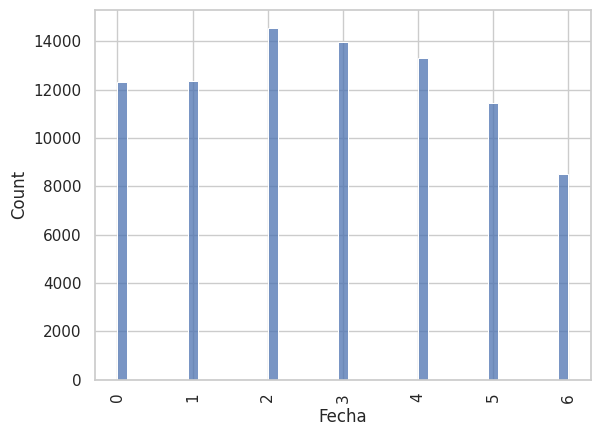

In [82]:
sns.histplot(data=df_fecha_datetime_dia, x="Fecha", stat='count')
plt.xticks(rotation=90)

In [83]:
df_fecha_datetime_año = df_fecha_datetime.dt.year
df_fecha_datetime_año

,Fecha
0,2017
1,2017
2,2017
3,2017
4,2017
...,...
86405,2023
86406,2023
86407,2023
86408,2023


In [84]:
df_fecha_datetime_año = pd.DataFrame(df_fecha_datetime_año)
df_fecha_datetime_año

,Fecha
0,2017
1,2017
2,2017
3,2017
4,2017
...,...
86405,2023
86406,2023
86407,2023
86408,2023


In [85]:
año_ordenado = pd.unique(df_fecha_datetime_año.Fecha)
año_ordenado.sort()
año_ordenado

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int32)

(array([2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. , 2017.5,
        2020. , 2022.5, 2025. ]),
 [Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2022.5, 0, '2022.5'),
  Text(2025.0, 0, '2025.0')])

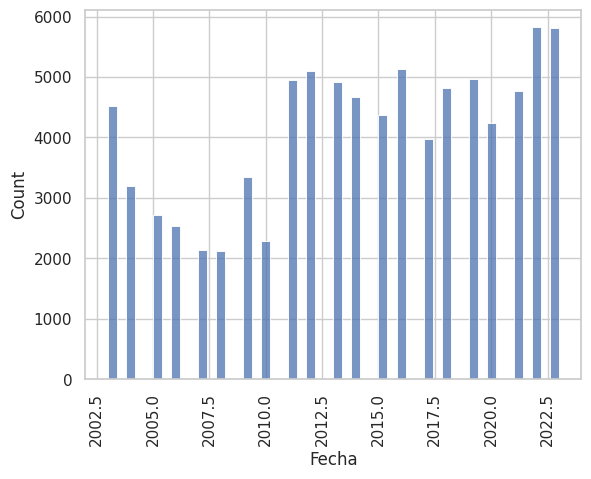

In [86]:
sns.histplot(data=df_fecha_datetime_año, x="Fecha", stat='count')
plt.xticks(rotation=90)

In [87]:
df_hurto_motos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86410 entries, 0 to 86409
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha_hecho          86410 non-null  object 
 1   cantidad             86410 non-null  float64
 2   latitud              68963 non-null  float64
 3   longitud             68963 non-null  float64
 4   sexo                 86410 non-null  object 
 5   edad                 86410 non-null  int64  
 6   estado_civil         86410 non-null  object 
 7   grupo_actor          86410 non-null  object 
 8   actividad_delictiva  86410 non-null  object 
 9   parentesco           86410 non-null  object 
 10  ocupacion            86410 non-null  object 
 11  discapacidad         86410 non-null  object 
 12  grupo_especial       86410 non-null  object 
 13  medio_transporte     86410 non-null  object 
 14  nivel_academico      86410 non-null  object 
 15  testigo              86410 non-null 

In [88]:
## Transformacion de tipos de datos
df_hurto_motos = df_hurto_motos.astype({"edad":"int32"})
df_hurto_motos = df_hurto_motos.astype({"cantidad":"int32"})
df_hurto_motos['estado_civil'] = df_hurto_motos['estado_civil'].astype('category')
df_hurto_motos = df_hurto_motos.astype({"latitud":"float32"})
df_hurto_motos = df_hurto_motos.astype({"longitud":"float32"})
df_hurto_motos = df_hurto_motos.astype({"sexo":"category"})
df_hurto_motos = df_hurto_motos.astype({"modelo":"int32"})
df_hurto_motos

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T23:00:00.000-05:00,1,6.268041,-75.549889,Hombre,29,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
1,2017-01-01T20:30:00.000-05:00,1,6.290076,-75.556892,Hombre,22,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005,Rojo,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
2,2017-01-01T07:00:00.000-05:00,1,6.304187,-75.551758,Hombre,23,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011,Verde,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
3,2017-01-01T09:00:00.000-05:00,1,6.248002,-75.574852,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Almacén tienda y otro,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
4,2017-01-01T16:30:00.000-05:00,1,6.268129,-75.557884,Hombre,34,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86405,2023-11-30T08:15:00.000-05:00,1,NaN,NaN,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86406,2023-11-30T08:30:00.000-05:00,1,NaN,NaN,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86407,2023-11-30T16:00:00.000-05:00,1,NaN,NaN,Hombre,24,Sin dato,Sin dato,Sin dato,Sin dato,...,Edificio,Laureles,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86408,2023-11-30T20:13:00.000-05:00,1,NaN,NaN,Hombre,45,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00


In [89]:
df_hurto_motos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86410 entries, 0 to 86409
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   fecha_hecho          86410 non-null  object  
 1   cantidad             86410 non-null  int32   
 2   latitud              68963 non-null  float32 
 3   longitud             68963 non-null  float32 
 4   sexo                 86410 non-null  category
 5   edad                 86410 non-null  int32   
 6   estado_civil         86410 non-null  category
 7   grupo_actor          86410 non-null  object  
 8   actividad_delictiva  86410 non-null  object  
 9   parentesco           86410 non-null  object  
 10  ocupacion            86410 non-null  object  
 11  discapacidad         86410 non-null  object  
 12  grupo_especial       86410 non-null  object  
 13  medio_transporte     86410 non-null  object  
 14  nivel_academico      86410 non-null  object  
 15  testigo            

In [90]:
df_hurto_motos.columns

Index(['fecha_hecho', 'cantidad', 'latitud', 'longitud', 'sexo', 'edad',
       'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',
       'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte',
       'nivel_academico', 'testigo', 'conducta', 'modalidad',
       'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal',
       'categoria_penal', 'nombre_barrio', 'codigo_barrio', 'codigo_comuna',
       'lugar', 'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien',
       'modelo', 'color', 'permiso', 'unidad_medida', 'fecha_ingestion'],
      dtype='object')

In [91]:
df_hurto_motos.isnull().sum()

,0
fecha_hecho,0
cantidad,0
latitud,17447
longitud,17447
sexo,0
edad,0
estado_civil,0
grupo_actor,0
actividad_delictiva,0
parentesco,0


In [92]:
df_hurto_motos.isnull()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86405,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86406,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86407,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86408,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Evaluo registros unicos de cada columna**

In [93]:
pd.unique(df_hurto_motos['sexo'])

['Hombre', 'Mujer', 'Sin dato']
Categories (3, object): ['Hombre', 'Mujer', 'Sin dato']

In [94]:
pd.unique(df_hurto_motos.sexo)

['Hombre', 'Mujer', 'Sin dato']
Categories (3, object): ['Hombre', 'Mujer', 'Sin dato']

In [95]:
pd.unique(df_hurto_motos.estado_civil)

['Soltero(a)', 'Unión marital de hecho', 'Sin dato', 'Casado(a)', 'Viudo(a)', 'Divorciado(a)']
Categories (6, object): ['Casado(a)', 'Divorciado(a)', 'Sin dato', 'Soltero(a)',
                         'Unión marital de hecho', 'Viudo(a)']

In [96]:
pd.unique(df_hurto_motos.edad)

array([ 29,  22,  23,  -1,  34,  20,  25,  31,  32,  43,  51,  28,  18,
        39,  35,  27,  19,  46,  50,  55,  24,  37,  33,  36,  53,  26,
        48,  15,  52,  44,  21,  16,  45,  38,  17,  42,  40,  49,  54,
        58,  30,  56,  57,  41,  60,  61,  47,  66,  63,  65,  59,  14,
        67,  73,  62,  71,  68,  64,  94,  70,   1,  75,  95,  13,   8,
        69,  72,  10,  74,  11,  76,  99,  77,   5,   4,  88,   3,   6,
        81,  12,  79,  78,  80,  89, 122], dtype=int32)

In [97]:
!pip install fuzzywuzzy

In [98]:
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [99]:
# Convertir todos los caracteres a minuscula
df_hurto_motos.nombre_barrio = df_hurto_motos.nombre_barrio.str.lower()
# Quitar espacios en blanco del final
df_hurto_motos.nombre_barrio = df_hurto_motos.nombre_barrio.str.strip()

In [100]:
# Retorna todos los valores unicos de la columna nombre barrio
barrios = df_hurto_motos['nombre_barrio'].unique()

# Ordena alfabeticamente
barrios.sort()
barrios

array(['aguas frias', 'aldea pablo vi', 'alejandro echavarría',
       'alejandría', 'alfonso lópez', 'altamira', 'altavista',
       'altavista sector central', 'altos del poblado', 'andalucía',
       'antonio nariño', 'aranjuez', 'asomadera no.1', 'asomadera no.2',
       'asomadera no.3', 'astorga', 'aures no.1', 'aures no.2',
       'b. cerro el volador', 'barrio caycedo', 'barrio colombia',
       'barrio colón', 'barrio cristóbal', 'barrios de jesús',
       'barro blanco', 'batallón cuarta brigada', 'batallón girardot',
       'belalcázar', 'belencito', 'bello horizonte', 'belén', 'berlin',
       'bermejal-los alamos', 'betania', 'blanquizal', 'bolivariana',
       'bomboná no.1', 'bomboná no.2', 'boqueron', 'bosques de san pablo',
       'boston', 'boyacá', 'brasilia', 'buenos aires',
       'buga patio bonito', 'calasania parte alta', 'calasanz',
       'calle nueva', 'campo alegre', 'campo amor', 'campo valdés no.1',
       'campo valdés no.2', 'caribe', 'carlos e. restrepo

In [101]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("naranjal", barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('naranjal', 100),
 ('naranjal s.c.', 80),
 ('las granjas', 63),
 ('aranjuez', 62),
 ('granizal', 62),
 ('los naranjos', 60),
 ('la francia', 56),
 ('granada', 53),
 ('la avanzada', 53),
 ('miranda', 53)]

In [102]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("volador", barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('el poblado', 59),
 ('popular', 57),
 ('robledo', 57),
 ('b. cerro el volador', 56),
 ('el salvador', 56),
 ('alejandría', 50),
 ('el salado', 50),
 ('la ladera', 50),
 ('oleoducto', 50),
 ('prado', 50)]

In [103]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("la palma", barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('la palma', 100),
 ('las palmas', 89),
 ('la loma', 80),
 ('la palma s.c.', 80),
 ('las palmas s.e.', 73),
 ('la pradera', 67),
 ('las playas', 67),
 ('la pilarica', 63),
 ('el pinal', 62),
 ('el pomar', 62)]

In [104]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("las playas", barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('las playas', 100),
 ('las playas s.c.', 83),
 ('las palmas', 80),
 ('la palma', 67),
 ('la pilarica', 67),
 ('las palmas s.e.', 67),
 ('la palma s.c.', 64),
 ('las violetas', 64),
 ('la ladera', 63),
 ('la piñuela', 63)]

In [105]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("pajarito", barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('pajarito', 100),
 ('pajarito s.c.', 80),
 ('picachito', 59),
 ('potrerito', 59),
 ('yarumalito', 56),
 ('palermo', 53),
 ('el patio', 50),
 ('área de expansión pajarito', 50),
 ('antonio nariño', 48),
 ('alejandría', 47)]

In [106]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("santa elena", barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('santa lucía', 76),
 ('santa mónica', 73),
 ('el llano santa elena', 71),
 ('santa inés', 70),
 ('santa fé', 67),
 ('sin dato 90 santa elena', 65),
 ('santa rosa de lima', 62),
 ('san bernardo', 61),
 ('el salado', 60),
 ('san germán', 60)]

In [107]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("facultad de minas", barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('facultad de minas u. nal', 85),
 ('facultad de minas u. nacional', 76),
 ('altamira', 56),
 ('v. el salado', 50),
 ('veinte de julio', 50),
 ('sin dato 50 palmitas', 49),
 ('lópez de mesa', 48),
 ('mirador del doce', 48),
 ('villa carlota', 47),
 ('altavista', 46)]

In [108]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 70):
    # get a list of unique strings
    strings = df[column].unique()

    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match,
                                         strings,
                                         limit=10,
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match

    # let us know the function's done
    print("All done!")

In [109]:
replace_matches_in_column(df=df_hurto_motos, column='nombre_barrio', string_to_match="naranjal")

All done!


In [110]:
replace_matches_in_column(df=df_hurto_motos, column='nombre_barrio', string_to_match="facultad de minas")

All done!


In [111]:
# Retorna todos los valores unicos de la columna nombre barrio
barrios = df_hurto_motos['nombre_barrio'].unique()

# Ordena alfabeticamente
barrios.sort()
barrios

array(['aguas frias', 'aldea pablo vi', 'alejandro echavarría',
       'alejandría', 'alfonso lópez', 'altamira', 'altavista',
       'altavista sector central', 'altos del poblado', 'andalucía',
       'antonio nariño', 'aranjuez', 'asomadera no.1', 'asomadera no.2',
       'asomadera no.3', 'astorga', 'aures no.1', 'aures no.2',
       'b. cerro el volador', 'barrio caycedo', 'barrio colombia',
       'barrio colón', 'barrio cristóbal', 'barrios de jesús',
       'barro blanco', 'batallón cuarta brigada', 'batallón girardot',
       'belalcázar', 'belencito', 'bello horizonte', 'belén', 'berlin',
       'bermejal-los alamos', 'betania', 'blanquizal', 'bolivariana',
       'bomboná no.1', 'bomboná no.2', 'boqueron', 'bosques de san pablo',
       'boston', 'boyacá', 'brasilia', 'buenos aires',
       'buga patio bonito', 'calasania parte alta', 'calasanz',
       'calle nueva', 'campo alegre', 'campo amor', 'campo valdés no.1',
       'campo valdés no.2', 'caribe', 'carlos e. restrepo

In [112]:
## Transformación y limpieza de valores duplicados
df_hurto_motos.replace("Sin dato 3 Manrique", "Manrique")
df_hurto_motos.replace("san pablo a.v.", "san pablo")
df_hurto_motos.replace("pajarito s.c.", "pajarito")

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T23:00:00.000-05:00,1,6.268041,-75.549889,Hombre,29,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
1,2017-01-01T20:30:00.000-05:00,1,6.290076,-75.556892,Hombre,22,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005,Rojo,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
2,2017-01-01T07:00:00.000-05:00,1,6.304187,-75.551758,Hombre,23,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011,Verde,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
3,2017-01-01T09:00:00.000-05:00,1,6.248002,-75.574852,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Almacén tienda y otro,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
4,2017-01-01T16:30:00.000-05:00,1,6.268129,-75.557884,Hombre,34,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86405,2023-11-30T08:15:00.000-05:00,1,NaN,NaN,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86406,2023-11-30T08:30:00.000-05:00,1,NaN,NaN,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86407,2023-11-30T16:00:00.000-05:00,1,NaN,NaN,Hombre,24,Sin dato,Sin dato,Sin dato,Sin dato,...,Edificio,Laureles,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
86408,2023-11-30T20:13:00.000-05:00,1,NaN,NaN,Hombre,45,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00


In [113]:
barrio = df_hurto_motos["nombre_barrio"].unique()
barrio.sort()
barrio

array(['aguas frias', 'aldea pablo vi', 'alejandro echavarría',
       'alejandría', 'alfonso lópez', 'altamira', 'altavista',
       'altavista sector central', 'altos del poblado', 'andalucía',
       'antonio nariño', 'aranjuez', 'asomadera no.1', 'asomadera no.2',
       'asomadera no.3', 'astorga', 'aures no.1', 'aures no.2',
       'b. cerro el volador', 'barrio caycedo', 'barrio colombia',
       'barrio colón', 'barrio cristóbal', 'barrios de jesús',
       'barro blanco', 'batallón cuarta brigada', 'batallón girardot',
       'belalcázar', 'belencito', 'bello horizonte', 'belén', 'berlin',
       'bermejal-los alamos', 'betania', 'blanquizal', 'bolivariana',
       'bomboná no.1', 'bomboná no.2', 'boqueron', 'bosques de san pablo',
       'boston', 'boyacá', 'brasilia', 'buenos aires',
       'buga patio bonito', 'calasania parte alta', 'calasanz',
       'calle nueva', 'campo alegre', 'campo amor', 'campo valdés no.1',
       'campo valdés no.2', 'caribe', 'carlos e. restrepo

**Identifico campos sin datos**

In [114]:
df_hurto_motos["grupo_actor"].unique()

array(['Sin dato'], dtype=object)

In [115]:
df_hurto_motos["actividad_delictiva"].unique()

array(['Sin dato'], dtype=object)

In [116]:
df_hurto_motos["parentesco"].unique()

array(['Sin dato'], dtype=object)

In [117]:
df_hurto_motos["testigo"].unique()

array(['Sin dato'], dtype=object)

In [118]:
df_hurto_motos["conducta"].unique()

array(['Hurto de moto'], dtype=object)

In [119]:
df_hurto_motos["caracterizacion"].unique()

array(['Sin dato'], dtype=object)

In [120]:
df_hurto_motos["conducta_especial"].unique()

array(['No', 'Sin dato', 'Falsificación', 'Piratería', 'De celular',
       'Medios informáticos', 'Fleteo', 'Desplazamiento forzado',
       'Grupo delincuencial', 'Muerte o lesión de delincuente',
       'A bus de servicio público', 'Incursión', 'Paseo millonario',
       'A taxista', 'Carcelaria', 'Voladura de infraestructura pública',
       'Hostigamiento', 'Pornografía infantil', 'De cable', 'Extorsión',
       'De Hidrocarburo', 'A vehículo repartidor', 'Paro o protesta',
       'De Aeronave', 'Plaza de vicio', 'Adulteración',
       'Violencia contra la mujer', 'Homicidio', 'Secuestro'],
      dtype=object)

In [121]:
df_hurto_motos["arma_medio"].unique()

array(['Llave maestra', 'Arma cortopunzante', 'Arma de fuego', 'No',
       'Objeto contundente', 'Sin dato', 'Escopolamina'], dtype=object)

In [122]:
df_hurto_motos["articulo_penal"].unique()

array(['Sin dato'], dtype=object)

In [123]:
df_hurto_motos["categoria_penal"].unique()

array(['Sin dato'], dtype=object)

In [124]:
df_hurto_motos["codigo_barrio"].unique()

array(['#0306', '#0211', '#0201', '#1007', '#0409', '#1507', '#0723',
       '#0811', '#0413', '#1006', '#1113', '#0602', '#1005', '#0517',
       '#0209', '#0107', '#0311', '#0504', '#1109', '#0712', '#1618',
       '#0908', '#0913', '#1020', '#1008', '#0206', '#1001', '#AUC2',
       '#1602', '#0410', '#1004', '#1207', '#0415', '#1318', '#0912',
       '#1017', '#1013', '#AE1', '#1503', '#1608', '#0724', '#1403',
       '#0903', '#1014', '#0519', '#1509', '#0707', '#1105', '#0711',
       '#1018', '#AUC1', '#0511', '#1319', '#0505', '#1504', '#1104',
       '#0809', '#0304', '#0819', '#Inst_11', '#0807', '#0907', '#1012',
       '#1011', '#1401', '#1417', '#0902', '#Inst_8', '#9011', '#0713',
       '#0405', '#0911', '#0706', '#1115', '#1419', '#0407', '#1308',
       '#0810', '#0501', '#1211', '#0718', '#0111', '#0608', '#0307',
       '#0510', '#1306', '#1103', '#0709', '#1003', '#1406', '#1016',
       '#0803', '#1422', '#1117', '#Inst_10', '#1202', '#1603', '#1114',
       '#0605

In [125]:
df_hurto_motos["lugar"].unique()

array(['Vía pública', 'Almacén tienda y otro', 'Parqueadero',
       'Residencia', 'Hotel, motel y hostal', 'Estación de gasolina',
       'Oficina', 'Vehículo particular', 'Droguería o farmacia',
       'Edificio',
       'Institución educativa (jardín, primaria o secundaria)',
       'Hospital o centro de salud', 'Fábrica o empresa', 'Parque',
       'Iglesia', 'Centro comercial', 'Estación del Metro', 'Banco',
       'Institución de educación superior', 'Sin dato',
       'Conjunto residencial', 'Escenario deportivo', 'Cementerio',
       'Restaurante', 'Taller mecánico', 'Bar o cantina',
       'Plaza de mercado', 'Estadero', 'Feria de ganado',
       'Terminal de transporte', 'Bus de servicio público',
       'Lavadero de carros', 'Local comercial', 'Casa o apartamento',
       'Obra en construcción', 'Finca', 'Matadero, carnicería y similar',
       'Supermercado', 'Compraventa', 'Bodega',
       'Instalación fuerza pública', 'Puente peatonal',
       'Caseta vigilancia conjunto 

In [126]:
df_hurto_motos = df_hurto_motos.drop([
    'parentesco',
    'actividad_delictiva',
    'grupo_actor',
    'ocupacion',
    'discapacidad',
    'grupo_especial',
    'nivel_academico',
    'testigo',
    'caracterizacion',
    'articulo_penal',
    'categoria_penal'],
    axis=1)

In [127]:
df_hurto_motos.columns

Index(['fecha_hecho', 'cantidad', 'latitud', 'longitud', 'sexo', 'edad',
       'estado_civil', 'medio_transporte', 'conducta', 'modalidad',
       'conducta_especial', 'arma_medio', 'nombre_barrio', 'codigo_barrio',
       'codigo_comuna', 'lugar', 'sede_receptora', 'bien', 'categoria_bien',
       'grupo_bien', 'modelo', 'color', 'permiso', 'unidad_medida',
       'fecha_ingestion'],
      dtype='object')

**Identificación de patrones**

In [128]:
hurtos_barrio = df_hurto_motos.groupby("nombre_barrio").size().sort_values(ascending=False)
hurtos_barrio

,0
nombre_barrio,
prado,2408
boston,1820
la candelaria,1758
sin dato,1732
manrique central no.1,1325
...,...
el patio,1
v. el salado,1
urquita,1


In [129]:
hurtos_sexo = df_hurto_motos.groupby("sexo").size().sort_values(ascending=False)
hurtos_sexo

<ipython-input-129-62da29b580ac>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hurtos_sexo = df_hurto_motos.groupby("sexo").size().sort_values(ascending=False)


,0
sexo,
Hombre,70218
Mujer,14523
Sin dato,1669


In [130]:
hurtos_estado_civil = df_hurto_motos.groupby("estado_civil").size().sort_values(ascending=False)
hurtos_estado_civil

<ipython-input-130-d75cc6137f0f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hurtos_estado_civil = df_hurto_motos.groupby("estado_civil").size().sort_values(ascending=False)


,0
estado_civil,
Soltero(a),45247
Unión marital de hecho,14473
Sin dato,12772
Casado(a),12243
Divorciado(a),1460
Viudo(a),215


In [131]:
hurtos_barrio_sexo = df_hurto_motos.groupby(["nombre_barrio", "sexo"]).size().sort_values(ascending=False)
hurtos_barrio_sexo

<ipython-input-131-b4133a051889>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hurtos_barrio_sexo = df_hurto_motos.groupby(["nombre_barrio", "sexo"]).size().sort_values(ascending=False)


,,0
nombre_barrio,sexo,
prado,Hombre,1964
la candelaria,Hombre,1490
boston,Hombre,1448
sin dato,Hombre,1037
manrique central no.1,Hombre,1011
...,...,...
sin dato 3 manrique,Sin dato,0
patio bonito,Sin dato,0
sin dato 50 palmitas,Mujer,0


In [132]:
hurtos_barrio_sexo = df_hurto_motos.groupby(["sexo","nombre_barrio"]).size().sort_values(ascending=False)
hurtos_barrio_sexo

<ipython-input-132-bf74789d85f2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hurtos_barrio_sexo = df_hurto_motos.groupby(["sexo","nombre_barrio"]).size().sort_values(ascending=False)


sexo      nombre_barrio        
Hombre    prado                    1964
          la candelaria            1490
          boston                   1448
          sin dato                 1037
          manrique central no.1    1011
                                   ... 
Sin dato  la florida s.a.p.           0
          la frisola                  0
          la frontera                 0
          la hondonada                0
          lalinde                     0
Length: 1002, dtype: int64

In [133]:
hurtos_sexo_estado_civil = df_hurto_motos.groupby(["sexo","estado_civil"]).size()
hurtos_sexo_estado_civil

<ipython-input-133-2b3ab9043ea0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hurtos_sexo_estado_civil = df_hurto_motos.groupby(["sexo","estado_civil"]).size()


sexo      estado_civil          
Hombre    Casado(a)                 10322
          Divorciado(a)              1088
          Sin dato                   9340
          Soltero(a)                37162
          Unión marital de hecho    12237
          Viudo(a)                     69
Mujer     Casado(a)                  1869
          Divorciado(a)               367
          Sin dato                   1966
          Soltero(a)                 7981
          Unión marital de hecho     2194
          Viudo(a)                    146
Sin dato  Casado(a)                    52
          Divorciado(a)                 5
          Sin dato                   1466
          Soltero(a)                  104
          Unión marital de hecho       42
          Viudo(a)                      0
dtype: int64

In [134]:
hurtos_sexo_edad = df_hurto_motos.groupby(["sexo","edad"]).size()
hurtos_sexo_edad

<ipython-input-134-464c9f00e2d1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hurtos_sexo_edad = df_hurto_motos.groupby(["sexo","edad"]).size()


sexo      edad
Hombre    -1      1093
           1         9
           3         1
           4         0
           5         1
                  ... 
Sin dato   89        0
           94        0
           95        0
           99        0
           122       0
Length: 255, dtype: int64

In [135]:
hurtos_sexo_modalidad = df_hurto_motos.groupby(["sexo","modalidad"]).size().sort_values(ascending=False)
hurtos_sexo_modalidad

<ipython-input-135-81c9733b4c05>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hurtos_sexo_modalidad = df_hurto_motos.groupby(["sexo","modalidad"]).size().sort_values(ascending=False)


sexo      modalidad                           
Hombre    Halado                                  42071
          Atraco                                  22826
Mujer     Halado                                   8188
          Atraco                                   5307
Hombre    Sin dato                                 3666
Sin dato  Halado                                    890
Hombre    Descuido                                  765
Sin dato  Atraco                                    702
Mujer     Sin dato                                  633
Hombre    Engaño                                    572
Mujer     Descuido                                  230
Hombre    Escopolamina                              142
          Llave maestra                             119
Mujer     Engaño                                    105
Sin dato  Sin dato                                   67
Hombre    Abuso de confianza                         36
Mujer     Escopolamina                               22
          Llave maestra                              18
          Abuso de confianza                         12
Hombre    Miedo o terror                              9
Sin dato  Engaño                                      7
Hombre    Tóxico o agente químico                     5
          Suplantación                                3
Mujer     Miedo o terror                              3
Hombre    Enfrentamiento con la fuerza pública        2
Mujer     Suplantación                                2
Hombre    Taquillazo                                  2
Mujer     Desvalijar o descuartizar                   2
          Vehículo                                    1
Sin dato  Descuido                                    1
          Miedo o terror                              1
          Escopolamina                                1
          Taquillazo                                  0
          Suplantación                                0
Hombre    Desvalijar o descuartizar                   0
Sin dato  Tóxico o agente químico                     0
          Llave maestra                               0
          Abuso de confianza                          0
          Enfrentamiento con la fuerza pública        0
          Desvalijar o descuartizar                   0
Hombre    Vehículo                                    0
Mujer     Tóxico o agente químico                     0
          Taquillazo                                  0
          Enfrentamiento con la fuerza pública        0
Sin dato  Vehículo                                    0
dtype: int64

In [136]:
hurtos_sexo_arma = df_hurto_motos.groupby(["sexo","arma_medio"]).size().sort_values(ascending=False)
hurtos_sexo_arma

<ipython-input-136-09967ce77cd7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hurtos_sexo_arma = df_hurto_motos.groupby(["sexo","arma_medio"]).size().sort_values(ascending=False)


sexo      arma_medio        
Hombre    Llave maestra         24879
          Arma de fuego         21479
          No                    14340
          Sin dato               7611
Mujer     Llave maestra          4588
          Arma de fuego          4304
          No                     3638
          Sin dato               1376
Hombre    Objeto contundente      979
          Arma cortopunzante      781
Sin dato  Llave maestra           744
          Arma de fuego           631
Mujer     Objeto contundente      372
          Arma cortopunzante      227
Sin dato  Sin dato                196
Hombre    Escopolamina            149
Sin dato  Arma cortopunzante       54
          No                       37
Mujer     Escopolamina             18
Sin dato  Objeto contundente        7
          Escopolamina              0
dtype: int64

Estadisticos

In [137]:
df_hurto_motos.edad.median()

28.0

In [138]:
df_hurto_motos.edad.mean()

29.635956486517763

In [139]:
df_hurto_motos.edad.std()

10.77376497664089

In [140]:
promedio_barrio = df_hurto_motos.groupby("nombre_barrio").size()
np.mean(promedio_barrio)

258.7125748502994

In [141]:
promedio_barrio

,0
nombre_barrio,
aguas frias,19
aldea pablo vi,24
alejandro echavarría,500
alejandría,43
alfonso lópez,436
...,...
área de expansión calasanz,20
área de expansión pajarito,690
área de expansión san antonio de prado,54


# **Hurto a personas**

In [142]:
df_hurto_personas = pd.read_csv("/content/drive/MyDrive/Datasets/hurto_a_persona.csv")
df_hurto_personas

<ipython-input-142-b1c0bf300c58>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hurto_personas = pd.read_csv("/content/drive/MyDrive/Datasets/hurto_a_persona.csv")


,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T01:00:00.000-05:00,1.0,6.299703,-75.582016,Mujer,33,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Doce de Octubre,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
1,2017-01-01T15:00:00.000-05:00,1.0,6.250917,-75.566160,Mujer,26,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
2,2017-01-01T14:00:00.000-05:00,1.0,6.274836,-75.554909,Hombre,30,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
3,2017-01-01T16:00:00.000-05:00,1.0,6.276236,-75.553533,Hombre,37,Casado(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
4,2017-01-01T16:00:00.000-05:00,1.0,6.250339,-75.586914,Hombre,87,Casado(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Billetera,Prendas de vestir y accesorios,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326484,2023-11-30T21:30:00.000-05:00,1.0,NaN,NaN,Hombre,29,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
326485,2023-11-30T23:00:00.000-05:00,1.0,NaN,NaN,Hombre,29,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Poblado,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
326486,2023-11-30T23:00:00.000-05:00,1.0,NaN,NaN,Hombre,40,Sin dato,Sin dato,Sin dato,Sin dato,...,Bar o cantina,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
326487,2023-11-30T23:20:00.000-05:00,1.0,NaN,NaN,Hombre,29,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00


**Analisis Exploratorio de Datos (EDA)**

In [143]:
df_hurto_personas.shape ## Retorna el tamaño del dataframe

(326489, 36)

In [144]:
df_hurto_personas.describe()

,cantidad,latitud,longitud,edad,modelo
count,326489.0,284545.000000,284545.000000,326489.000000,326489.000000
mean,1.0,6.246950,-75.572000,34.335126,0.106527
std,0.0,0.037377,0.618576,13.120093,47.092037
min,1.0,3.855871,-76.317445,-1.000000,-1.000000
25%,1.0,6.234175,-75.587787,25.000000,-1.000000
50%,1.0,6.248980,-75.571988,32.000000,-1.000000
75%,1.0,6.259588,-75.565975,42.000000,-1.000000
max,1.0,10.155289,75.607180,121.000000,2023.000000


In [145]:
df_hurto_personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326489 entries, 0 to 326488
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha_hecho          326489 non-null  object 
 1   cantidad             326489 non-null  float64
 2   latitud              284545 non-null  float64
 3   longitud             284545 non-null  float64
 4   sexo                 326489 non-null  object 
 5   edad                 326489 non-null  int64  
 6   estado_civil         326489 non-null  object 
 7   grupo_actor          326489 non-null  object 
 8   actividad_delictiva  326489 non-null  object 
 9   parentesco           326489 non-null  object 
 10  ocupacion            326489 non-null  object 
 11  discapacidad         326489 non-null  object 
 12  grupo_especial       326489 non-null  object 
 13  medio_transporte     326489 non-null  object 
 14  nivel_academico      326489 non-null  object 
 15  testigo          

In [146]:
df_hurto_personas = df_hurto_personas.astype({"sexo":"category"})
df_hurto_personas = df_hurto_personas.astype({"nombre_barrio":"category"})
df_hurto_personas = df_hurto_personas.astype({"bien":"category"})

In [147]:
df_hurto_personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326489 entries, 0 to 326488
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   fecha_hecho          326489 non-null  object  
 1   cantidad             326489 non-null  float64 
 2   latitud              284545 non-null  float64 
 3   longitud             284545 non-null  float64 
 4   sexo                 326489 non-null  category
 5   edad                 326489 non-null  int64   
 6   estado_civil         326489 non-null  object  
 7   grupo_actor          326489 non-null  object  
 8   actividad_delictiva  326489 non-null  object  
 9   parentesco           326489 non-null  object  
 10  ocupacion            326489 non-null  object  
 11  discapacidad         326489 non-null  object  
 12  grupo_especial       326489 non-null  object  
 13  medio_transporte     326489 non-null  object  
 14  nivel_academico      326489 non-null  object  
 15  

In [148]:
df_hurto_personas.bien

,bien
0,Celular
1,Celular
2,Celular
3,Celular
4,Billetera
...,...
326484,Sin dato
326485,Sin dato
326486,Sin dato
326487,Sin dato


In [149]:
pd.unique(df_hurto_personas["bien"])

['Celular', 'Billetera', 'Elementos escolares', 'Cámara', 'Peso', ..., 'Botones', 'Tapa de alcantarilla', 'Selladora', 'Cacao', 'Ácido']
Length: 441
Categories (441, object): ['Abono', 'Accesorios armas', 'Accesorios celular',
                           'Accesorios de peluquería', ..., 'Whiskey', 'Zapatos', 'Zorro', 'Ácido']

In [150]:
df_hurto_personas.columns

Index(['fecha_hecho', 'cantidad', 'latitud', 'longitud', 'sexo', 'edad',
       'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',
       'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte',
       'nivel_academico', 'testigo', 'conducta', 'modalidad',
       'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal',
       'categoria_penal', 'nombre_barrio', 'codigo_barrio', 'codigo_comuna',
       'lugar', 'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien',
       'modelo', 'color', 'permiso', 'unidad_medida', 'fecha_ingestion'],
      dtype='object')

In [151]:
## Identificamos valores nulos
df_hurto_personas.isnull().sum()

,0
fecha_hecho,0
cantidad,0
latitud,41944
longitud,41944
sexo,0
edad,0
estado_civil,0
grupo_actor,0
actividad_delictiva,0
parentesco,0


In [152]:
pd.unique(df_hurto_personas["nivel_academico"])

array(['Sin dato'], dtype=object)

In [153]:
df_hurto_personas["nivel_academico"]

,nivel_academico
0,Sin dato
1,Sin dato
2,Sin dato
3,Sin dato
4,Sin dato
...,...
326484,Sin dato
326485,Sin dato
326486,Sin dato
326487,Sin dato


In [154]:
pd.unique(df_hurto_personas["nombre_barrio"])

['Doce de Octubre No.2', 'La Candelaria', 'Campo Valdés No.1', 'Naranjal', 'La Loma de los Bernal', ..., 'Sin dato 3 Manrique', 'Sin dato 7 Robledo', 'Sin dato 15 Guayabal', 'Sin dato 6 Doce de Octubre', 'Sin dato 11 Laureles -  Estadio']
Length: 344
Categories (344, object): ['Aguas Frias', 'Aldea Pablo VI', 'Alejandro Echavarría', 'Alejandría',
                           ..., 'Área de expansión Eduardo Santos',
                           'Área de expansión El Noral', 'Área de expansión Pajarito',
                           'Área de expansión San Antonio De Prado']

In [155]:
pd.unique(df_hurto_personas["ocupacion"])

array(['Sin dato'], dtype=object)

In [156]:
df_hurto_personas = df_hurto_personas.drop(columns=["ocupacion",
                                "nivel_academico",
                                "parentesco",
                                "discapacidad",
                                "grupo_actor",
                                "categoria_penal",
                                "grupo_especial",
                                "articulo_penal",
                                "permiso",
                                "testigo",
                                "caracterizacion",
                                "actividad_delictiva",
                                "unidad_medida"
                                ])

In [157]:
df_hurto_personas

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,medio_transporte,conducta,modalidad,...,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,fecha_ingestion
0,2017-01-01T01:00:00.000-05:00,1.0,6.299703,-75.582016,Mujer,33,Unión marital de hecho,Caminata,Hurto a persona,Atraco,...,#0603,6,Vía pública,Doce de Octubre,Celular,Tecnología,Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
1,2017-01-01T15:00:00.000-05:00,1.0,6.250917,-75.566160,Mujer,26,Soltero(a),Caminata,Hurto a persona,Atraco,...,#1019,10,Vía pública,Candelaria,Celular,Tecnología,Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
2,2017-01-01T14:00:00.000-05:00,1.0,6.274836,-75.554909,Hombre,30,Soltero(a),Caminata,Hurto a persona,Descuido,...,#0410,4,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,2024-10-06T04:07:03.000-05:00
3,2017-01-01T16:00:00.000-05:00,1.0,6.276236,-75.553533,Hombre,37,Casado(a),Taxi,Hurto a persona,Atraco,...,#0410,4,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,2024-10-06T04:07:03.000-05:00
4,2017-01-01T16:00:00.000-05:00,1.0,6.250339,-75.586914,Hombre,87,Casado(a),Caminata,Hurto a persona,Engaño,...,#1103,11,Vía pública,Laureles,Billetera,Prendas de vestir y accesorios,Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326484,2023-11-30T21:30:00.000-05:00,1.0,NaN,NaN,Hombre,29,Sin dato,Caminata,Hurto a persona,Cosquilleo,...,SIN DATO,SIN DATO,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00
326485,2023-11-30T23:00:00.000-05:00,1.0,NaN,NaN,Hombre,29,Sin dato,Caminata,Hurto a persona,Cosquilleo,...,SIN DATO,SIN DATO,Vía pública,Poblado,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00
326486,2023-11-30T23:00:00.000-05:00,1.0,NaN,NaN,Hombre,40,Sin dato,Caminata,Hurto a persona,Descuido,...,#1019,10,Bar o cantina,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00
326487,2023-11-30T23:20:00.000-05:00,1.0,NaN,NaN,Hombre,29,Sin dato,Caminata,Hurto a persona,Cosquilleo,...,SIN DATO,SIN DATO,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00


In [158]:
df_hurto_personas.shape

(326489, 23)

In [159]:
df_hurto_personas.columns

Index(['fecha_hecho', 'cantidad', 'latitud', 'longitud', 'sexo', 'edad',
       'estado_civil', 'medio_transporte', 'conducta', 'modalidad',
       'conducta_especial', 'arma_medio', 'nombre_barrio', 'codigo_barrio',
       'codigo_comuna', 'lugar', 'sede_receptora', 'bien', 'categoria_bien',
       'grupo_bien', 'modelo', 'color', 'fecha_ingestion'],
      dtype='object')

In [160]:
df_hurto_personas.groupby("sexo").size()

<ipython-input-160-bd19952bc2e0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hurto_personas.groupby("sexo").size()


,0
sexo,
Hombre,191368
Mujer,133420
Sin dato,1701


In [161]:
df_estado_civil = df_hurto_personas.groupby("estado_civil").size()
df_estado_civil

,0
estado_civil,
Casado(a),59263
Divorciado(a),8842
Sin dato,38103
Soltero(a),172327
Unión marital de hecho,44729
Viudo(a),3225


In [162]:
df_estado_civil.sort_values(ascending=False)

,0
estado_civil,
Soltero(a),172327
Casado(a),59263
Unión marital de hecho,44729
Sin dato,38103
Divorciado(a),8842
Viudo(a),3225


In [163]:
df_barrio = df_hurto_personas.groupby("nombre_barrio").size()
df_barrio

<ipython-input-163-0a2d864f2cf6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_barrio = df_hurto_personas.groupby("nombre_barrio").size()


,0
nombre_barrio,
Aguas Frias,43
Aldea Pablo VI,49
Alejandro Echavarría,817
Alejandría,816
Alfonso López,744
...,...
Área de expansión Calasanz,56
Área de expansión Eduardo Santos,1
Área de expansión El Noral,1


In [164]:
df_barrio.sort_values(ascending=False)

,0
nombre_barrio,
La Candelaria,37473
El Poblado,9479
Guayaquil,6945
Barrio Colón,6654
Prado,5799
...,...
Sin dato 15 Guayabal,3
Sin dato 11 Laureles - Estadio,1
La Suiza,1


In [165]:
hurtos_per_sexo_barrio = df_hurto_personas.groupby(["sexo","nombre_barrio"]).size()
hurtos_per_sexo_barrio

<ipython-input-165-85336a9d5b87>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hurtos_per_sexo_barrio = df_hurto_personas.groupby(["sexo","nombre_barrio"]).size()


sexo      nombre_barrio                         
Hombre    Aguas Frias                                31
          Aldea Pablo VI                             22
          Alejandro Echavarría                      448
          Alejandría                                471
          Alfonso López                             452
                                                   ... 
Sin dato  Área de expansión Calasanz                  0
          Área de expansión Eduardo Santos            0
          Área de expansión El Noral                  0
          Área de expansión Pajarito                  2
          Área de expansión San Antonio De Prado      0
Length: 1032, dtype: int64

In [166]:
hurtos_per_sexo_barrio.sort_values(ascending=False)

sexo      nombre_barrio                         
Hombre    La Candelaria                             19921
Mujer     La Candelaria                             17416
Hombre    El Poblado                                 5691
Mujer     El Poblado                                 3685
Hombre    San Benito                                 3562
                                                    ...  
Sin dato  La Libertad                                   0
          La Loma                                       0
          La Palma S.C.                                 0
          La Pradera                                    0
          Área de expansión San Antonio De Prado        0
Length: 1032, dtype: int64

In [167]:
avg_sexo_por_edad = df_hurto_personas.groupby('sexo')['edad'].mean()
avg_sexo_por_edad

<ipython-input-167-f5368540fd17>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sexo_por_edad = df_hurto_personas.groupby('sexo')['edad'].mean()


,edad
sexo,
Hombre,34.292468
Mujer,34.844446
Sin dato,-0.814815


In [168]:
avg_barrio_por_edad = df_hurto_personas.groupby('nombre_barrio')['edad'].mean().sort_values(ascending=False)
avg_barrio_por_edad

<ipython-input-168-e657547ef209>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_barrio_por_edad = df_hurto_personas.groupby('nombre_barrio')['edad'].mean().sort_values(ascending=False)


,edad
nombre_barrio,
Barro Blanco,49.666667
Potrera Miserenga,48.666667
Sin dato 15 Guayabal,47.666667
Volcana Guayabal,44.055556
El Astillero,43.642857
...,...
Sin dato 3 Manrique,25.142857
Área de expansión Eduardo Santos,21.000000
La Ilusion,16.000000


In [169]:
avg_barrio_por_edad.index

CategoricalIndex(['Barro Blanco', 'Potrera Miserenga', 'Sin dato 15 Guayabal',
                  'Volcana Guayabal', 'El Astillero', 'La Aldea', 'Boqueron',
                  'La Sucia', 'El Uvito', 'Asomadera No.2',
                  ...
                  'Parque Norte', 'Aldea Pablo VI', 'Universidad de Antioquia',
                  'San Jose', 'La Cuchilla', 'Sin dato 3 Manrique',
                  'Área de expansión Eduardo Santos', 'La Ilusion',
                  'Sin dato 11 Laureles -  Estadio', 'La Suiza'],
                 categories=['Aguas Frias', 'Aldea Pablo VI', 'Alejandro Echavarría', 'Alejandría', ..., 'Área de expansión Eduardo Santos', 'Área de expansión El Noral', 'Área de expansión Pajarito', 'Área de expansión San Antonio De Prado'], ordered=False, dtype='category', name='nombre_barrio', length=344)

In [170]:
avg_barrio_por_edad.loc['Universidad de Antioquia']

29.103795507358637

In [171]:
avg_barrio_por_edad.std()  ## Calculo de desviacion estandar de edades

3.4706415525716703

In [172]:
avg_barrio_por_edad.mean()  ## Calculo de media por edades y barrios

34.253928713232845

In [173]:
avg_barrio_por_edad.loc['Facultad de Minas U. Nacional']

30.857142857142858

In [174]:
avg_barrio_por_edad.loc['La Candelaria']

35.32794278547221

In [175]:
## Filtro por nombre de barrio
df_hurto_personas[df_hurto_personas.nombre_barrio=="Facultad de Minas U. Nacional"]

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,medio_transporte,conducta,modalidad,...,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,fecha_ingestion
1347,2003-03-10T15:30:00.000-05:00,1.0,NaN,NaN,Hombre,46,Casado(a),Sin dato,Hurto a persona,Halado,...,#0705,7,Vía pública,Castilla,Sin dato mercancías,Sin dato mercancías,Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
1349,2003-03-10T15:30:00.000-05:00,1.0,NaN,NaN,Hombre,46,Sin dato,Sin dato,Hurto a persona,Sin dato,...,#0705,7,Vía pública,Sin dato,Sin dato mercancías,Sin dato mercancías,Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
10700,2017-04-06T19:30:00.000-05:00,1.0,6.273074,-75.589113,Hombre,30,Unión marital de hecho,Taxi,Hurto a persona,Atraco,...,#0705,7,Vía pública,Castilla,Celular,Tecnología,Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
12567,2017-05-10T14:00:00.000-05:00,1.0,6.274317,-75.590345,Hombre,33,Casado(a),Caminata,Hurto a persona,Atraco,...,#0705,7,Vía pública,Castilla,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
28222,2017-09-27T10:50:00.000-05:00,1.0,6.272777,-75.589767,Mujer,28,Unión marital de hecho,Caminata,Hurto a persona,Engaño,...,#0705,7,Vía pública,Castilla,Celular,Tecnología,Mercancía,-1,Negro,2024-10-06T04:07:03.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292798,2022-11-08T08:30:00.000-05:00,1.0,6.273208,-75.590362,Mujer,44,Casado(a),Caminata,Hurto a persona,Descuido,...,#0705,7,"Institución educativa (jardín, primaria o secu...",Castilla,Tablet,Tecnología,Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
294771,2022-11-28T20:30:00.000-05:00,1.0,6.272610,-75.590234,Hombre,5,Soltero(a),Caminata,Hurto a persona,Atraco,...,#0705,7,Estación del Metro,Castilla,Celular,Tecnología,Mercancía,-1,Azul,2024-10-06T04:07:03.000-05:00
295354,2022-12-04T03:30:00.000-05:00,1.0,6.272968,-75.589190,Hombre,25,Soltero(a),Caminata,Hurto a persona,Raponazo,...,#0705,7,Estación del Metro plus,Castilla,Celular,Tecnología,Mercancía,-1,Gris,2024-10-06T04:07:03.000-05:00
313206,2023-06-13T20:30:00.000-05:00,1.0,NaN,NaN,Mujer,-1,Sin dato,Caminata,Hurto a persona,Descuido,...,#0705,7,Institución de educación superior,Castilla,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00


Analisis estadistico - Medidas de Tendencia Central

(array([4.76800e+03, 5.82010e+04, 1.36697e+05, 7.47020e+04, 3.62320e+04,
        1.33920e+04, 2.27400e+03, 2.20000e+02, 0.00000e+00, 3.00000e+00]),
 array([ -1. ,  11.2,  23.4,  35.6,  47.8,  60. ,  72.2,  84.4,  96.6,
        108.8, 121. ]),
 <BarContainer object of 10 artists>)

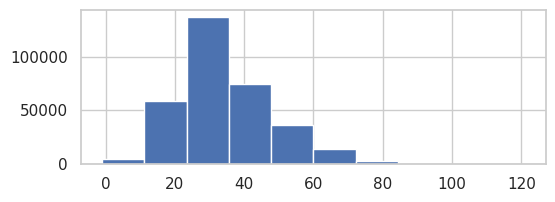

In [176]:
plt.figure(figsize=(6,2))            ## Configuro el tamaño de mi grafico
plt.hist(df_hurto_personas["edad"])  ## Le aplico el histograma a columna edad

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Caminata'),
  Text(1, 0, 'Taxi'),
  Text(2, 0, 'Motocicleta'),
  Text(3, 0, 'Automóvil'),
  Text(4, 0, 'Metro'),
  Text(5, 0, 'Bicicleta'),
  Text(6, 0, 'Autobus'),
  Text(7, 0, 'Motocicleta con parrillero'),
  Text(8, 0, 'Sin dato'),
  Text(9, 0, 'Planeador')])

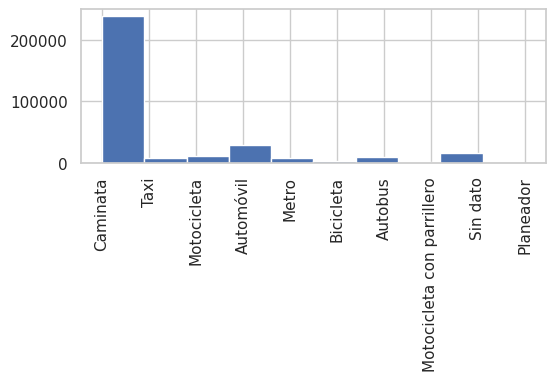

In [177]:
plt.figure(figsize=(6,2))         ## Configuro el tamaño de mi grafico
plt.hist(df_hurto_personas["medio_transporte"])  ## Le aplico el histograma a columna edad
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Caminata'),
  Text(1, 0, 'Taxi'),
  Text(2, 0, 'Motocicleta'),
  Text(3, 0, 'Automóvil'),
  Text(4, 0, 'Metro'),
  Text(5, 0, 'Bicicleta'),
  Text(6, 0, 'Autobus'),
  Text(7, 0, 'Motocicleta con parrillero'),
  Text(8, 0, 'Sin dato'),
  Text(9, 0, 'Planeador')])

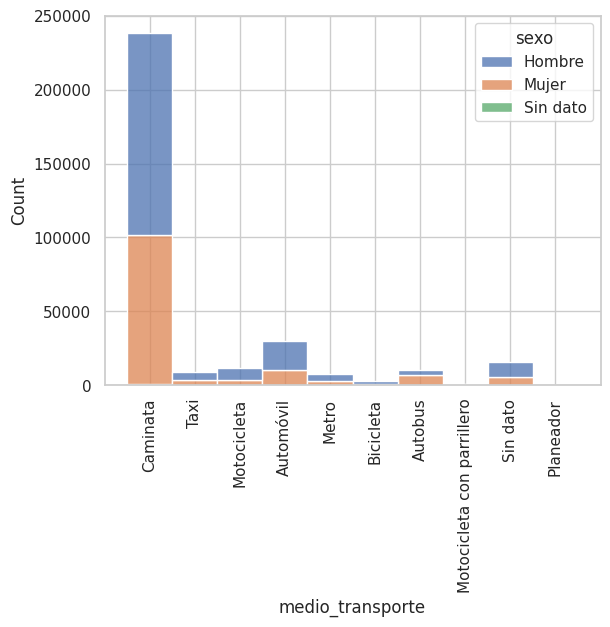

In [178]:
sns.histplot(data=df_hurto_personas, x="medio_transporte", hue="sexo", multiple="stack")
plt.xticks(rotation=90)

(array([4.76800e+03, 5.82010e+04, 1.36697e+05, 7.47020e+04, 3.62320e+04,
        1.33920e+04, 2.27400e+03, 2.20000e+02, 0.00000e+00, 3.00000e+00]),
 array([ -1. ,  11.2,  23.4,  35.6,  47.8,  60. ,  72.2,  84.4,  96.6,
        108.8, 121. ]),
 <BarContainer object of 10 artists>)

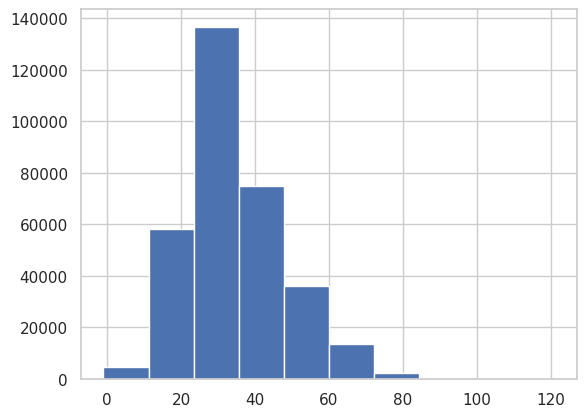

In [179]:
plt.hist(df_hurto_personas["edad"], bins=10)

In [180]:
df_hurto_personas["modalidad"].unique()

array(['Atraco', 'Descuido', 'Engaño', 'Rompimiento de ventana',
       'Sin dato', 'Raponazo', 'Cosquilleo', 'Rompimiento cerraduta',
       'Halado', 'Llave maestra', 'Tóxico o agente químico',
       'Suplantación', 'Paquete chileno', 'Violencia intrafamiliar',
       'Abuso de confianza', 'Enfrentamiento con la fuerza pública',
       'Comisión de delito', 'Escopolamina', 'Clonación de tarjeta',
       'Simulando necesidad', 'Miedo o terror', 'Vandalismo', 'Forcejeo',
       'Retención de tarjeta', 'Informático', 'Retención de dinero',
       'Auto robo', 'Llamada millonaria', 'Fleteo',
       'Rompimiento cerradura'], dtype=object)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Atraco'),
  Text(1, 0, 'Descuido'),
  Text(2, 0, 'Engaño'),
  Text(3, 0, 'Rompimiento de ventana'),
  Text(4, 0, 'Sin dato'),
  Text(5, 0, 'Raponazo'),
  Text(6, 0, 'Cosquilleo'),
  Text(7, 0, 'Rompimiento cerraduta'),
  Text(8, 0, 'Halado'),
  Text(9, 0, 'Llave maestra'),
  Text(10, 0, 'Tóxico o agente químico'),
  Text(11, 0, 'Suplantación'),
  Text(12, 0, 'Paquete chileno'),
  Text(13, 0, 'Violencia intrafamiliar'),
  Text(14, 0, 'Abuso de confianza'),
  Text(15, 0, 'Enfrentamiento con la fuerza pública'),
  Text(16, 0, 'Comisión de delito'),
  Text(17, 0, 'Escopolamina'),
  Text(18, 0, 'Clonación de tarjeta'),
  Text(19, 0, 'Simulando necesidad'),
  Text(20, 0, 'Miedo o terror'),
  Text(21, 0, 'Vandalismo'),
  Text(22, 0, 'Forcejeo'),
  Text(23, 0, 'Retención de tarjeta'),
  Text(24, 0, 'Informático'

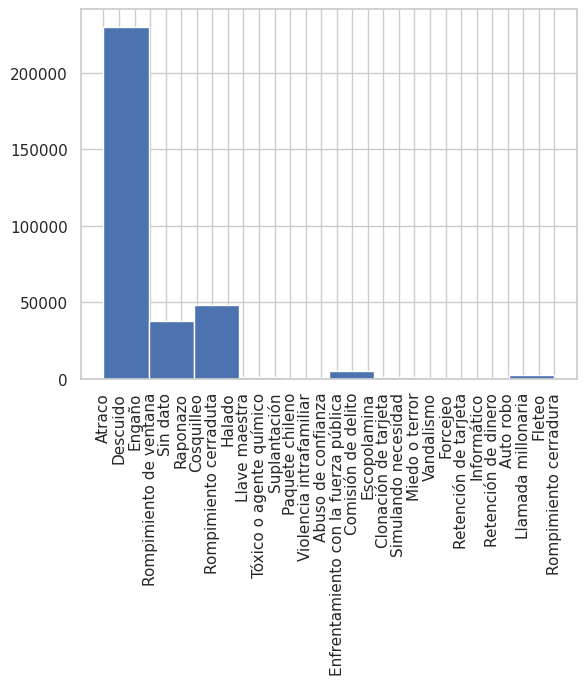

In [181]:
plt.hist(df_hurto_personas["modalidad"])
plt.xticks(rotation=90)

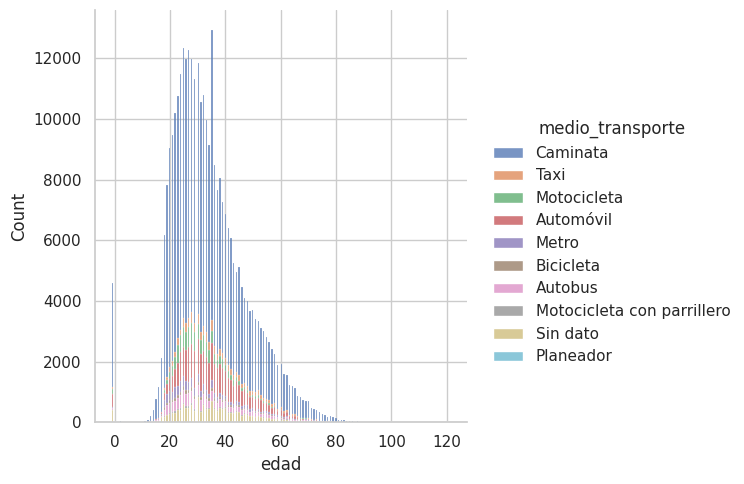

In [182]:
sns.displot(df_hurto_personas, x="edad", hue="medio_transporte", multiple="stack")

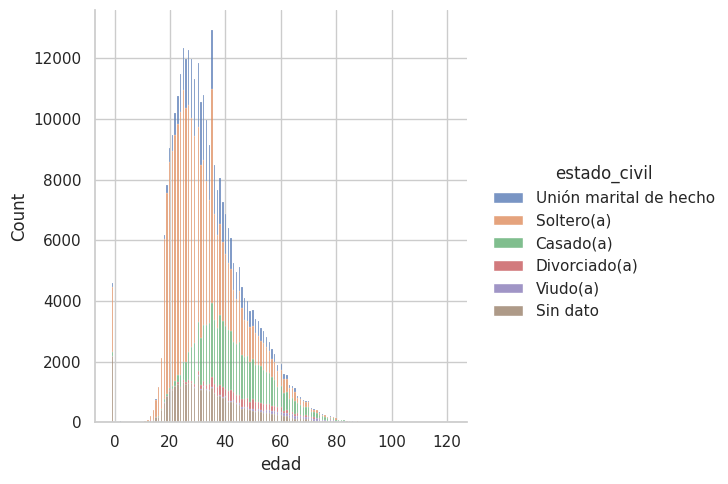

In [183]:
sns.displot(df_hurto_personas, x="edad", hue="estado_civil", multiple="stack")

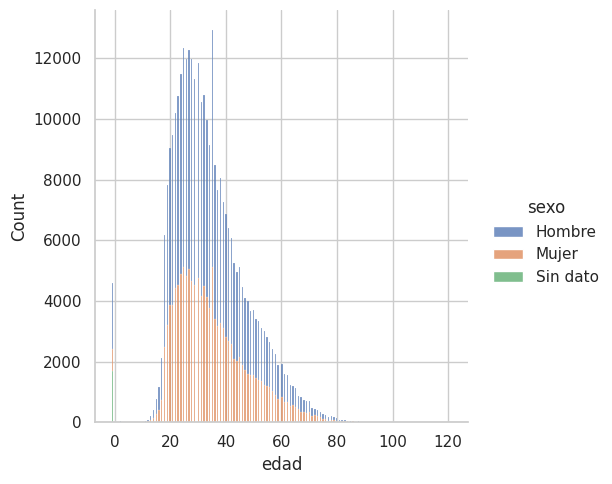

In [184]:
sns.displot(df_hurto_personas, x="edad", hue="sexo", multiple="stack")

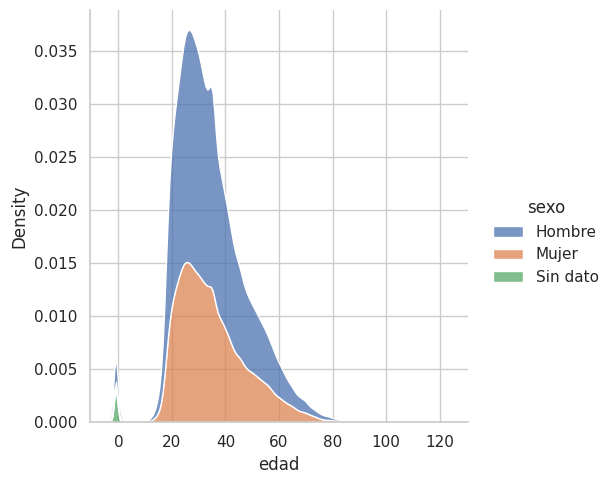

In [185]:
sns.displot(df_hurto_personas, x="edad", hue="sexo", kind="kde", multiple="stack")

<ipython-input-186-ee8a3b1ca9ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_hurto_personas['sexo'], y=df_hurto_personas['edad'], palette="pastel")


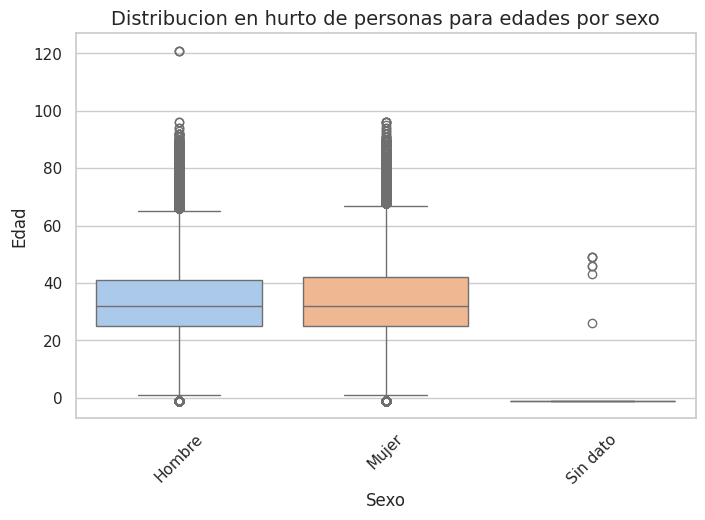

In [186]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_hurto_personas['sexo'], y=df_hurto_personas['edad'], palette="pastel")
plt.title('Distribucion en hurto de personas para edades por sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-187-b2a4ab3809aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_hurto_personas['estado_civil'], y=df_hurto_personas['edad'], palette="pastel")


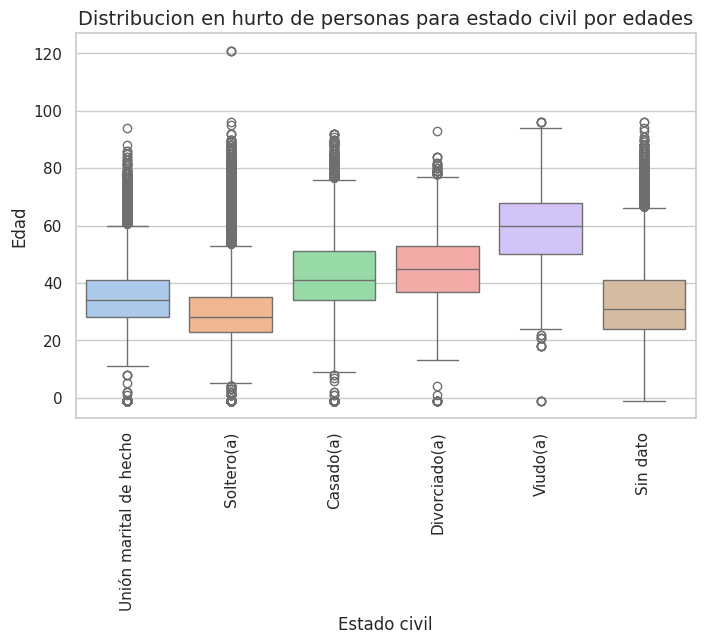

In [187]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_hurto_personas['estado_civil'], y=df_hurto_personas['edad'], palette="pastel")
plt.title('Distribucion en hurto de personas para estado civil por edades', fontsize=14)
plt.xlabel('Estado civil', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Distribucion en hurto de personas para sexo por edades')

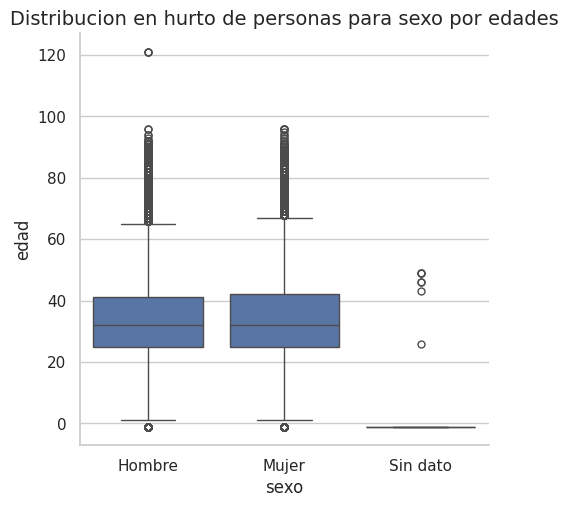

In [188]:
sns.catplot(data=df_hurto_personas, x="sexo", y="edad", kind="box")
plt.title('Distribucion en hurto de personas para sexo por edades', fontsize=14)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unión marital de hecho'),
  Text(1, 0, 'Soltero(a)'),
  Text(2, 0, 'Casado(a)'),
  Text(3, 0, 'Divorciado(a)'),
  Text(4, 0, 'Viudo(a)'),
  Text(5, 0, 'Sin dato')])

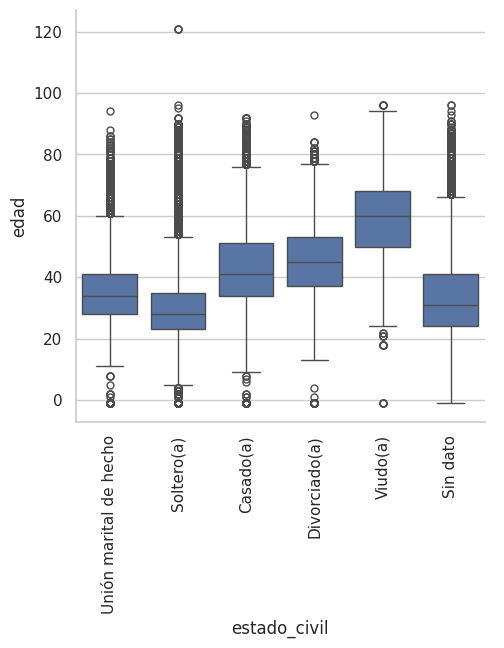

In [189]:
sns.catplot(data=df_hurto_personas, x="estado_civil", y="edad", kind="box")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unión marital de hecho'),
  Text(1, 0, 'Soltero(a)'),
  Text(2, 0, 'Casado(a)'),
  Text(3, 0, 'Divorciado(a)'),
  Text(4, 0, 'Viudo(a)'),
  Text(5, 0, 'Sin dato')])

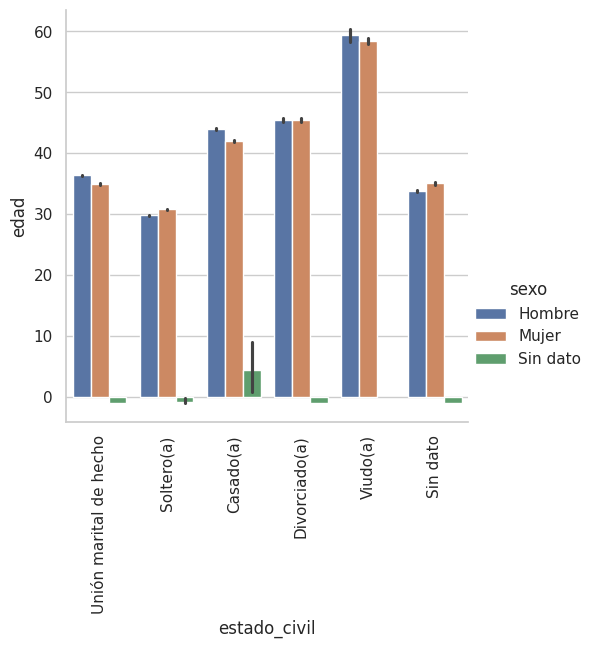

In [190]:
sns.catplot(data=df_hurto_personas, x="estado_civil", y="edad", hue="sexo", kind="bar")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Atraco'),
  Text(1, 0, 'Descuido'),
  Text(2, 0, 'Engaño'),
  Text(3, 0, 'Rompimiento de ventana'),
  Text(4, 0, 'Sin dato'),
  Text(5, 0, 'Raponazo'),
  Text(6, 0, 'Cosquilleo'),
  Text(7, 0, 'Rompimiento cerraduta'),
  Text(8, 0, 'Halado'),
  Text(9, 0, 'Llave maestra'),
  Text(10, 0, 'Tóxico o agente químico'),
  Text(11, 0, 'Suplantación'),
  Text(12, 0, 'Paquete chileno'),
  Text(13, 0, 'Violencia intrafamiliar'),
  Text(14, 0, 'Abuso de confianza'),
  Text(15, 0, 'Enfrentamiento con la fuerza pública'),
  Text(16, 0, 'Comisión de delito'),
  Text(17, 0, 'Escopolamina'),
  Text(18, 0, 'Clonación de tarjeta'),
  Text(19, 0, 'Simulando necesidad'),
  Text(20, 0, 'Miedo o terror'),
  Text(21, 0, 'Vandalismo'),
  Text(22, 0, 'Forcejeo'),
  Text(23, 0, 'Retención de tarjeta'),
  Text(24, 0, 'Informático'

<Figure size 4000x1000 with 0 Axes>

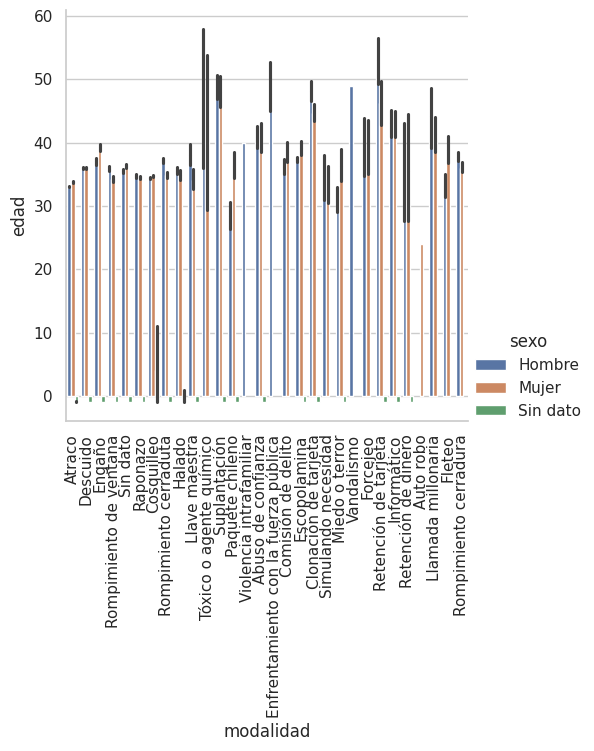

In [191]:
plt.figure(figsize=(40,10))
sns.catplot(data=df_hurto_personas, x="modalidad", y="edad", hue="sexo", kind="bar")
plt.xticks(rotation=90)